In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Notes:
* DD1 was removed at almost 8.5 kN (60% load) to avoid damaging it when roving collapse.
* **E-modulus:**	DD1 readings are only valid in tests F1 to F5. However, F5 has a slip in DD1 readings which was fixed too
* **F_max & f_t:**	All tests except F8 and F10 can be used to get the maximum force

In [2]:
tests_data = [] # Include tests from F1 to F10
for i in range(10):
    path = r'results/carbon_tensile_tests/F' + str(i+1) + '.txt'
    tests_data.append(np.array(pd.read_csv(path, delimiter='	', decimal=',', skiprows=1, encoding= 'unicode_escape')))
# force = tests_data[i][:, 1]
# weg = tests_data[i][:, 2]
# dd1 = tests_data[i][:, 3]

## Calculate F_max, f_t for all tests except F8 and F10

In [3]:
f_max_sum = 0
for i in range(10):
    if i != 7 and i!=9:
        f_max = np.max(np.abs(tests_data[i][:, 1]))
        print('Test F' + str(i+1) + ', f_max = ' + str(f_max))
        f_max_sum += f_max
f_max_avg = f_max_sum/8
A = 3.62
print('f_max = ' + str(f_max_avg))
print('f_t = ' + str(f_max_avg * 1000 / A))

Test F1, f_max = 13.45
Test F2, f_max = 15.13
Test F3, f_max = 13.72
Test F4, f_max = 13.16
Test F5, f_max = 12.92
Test F6, f_max = 14.65
Test F7, f_max = 13.13
Test F9, f_max = 14.58
f_max = 13.8425
f_t = 3823.8950276243095


## Calculate E_f for F1 - F5 tests

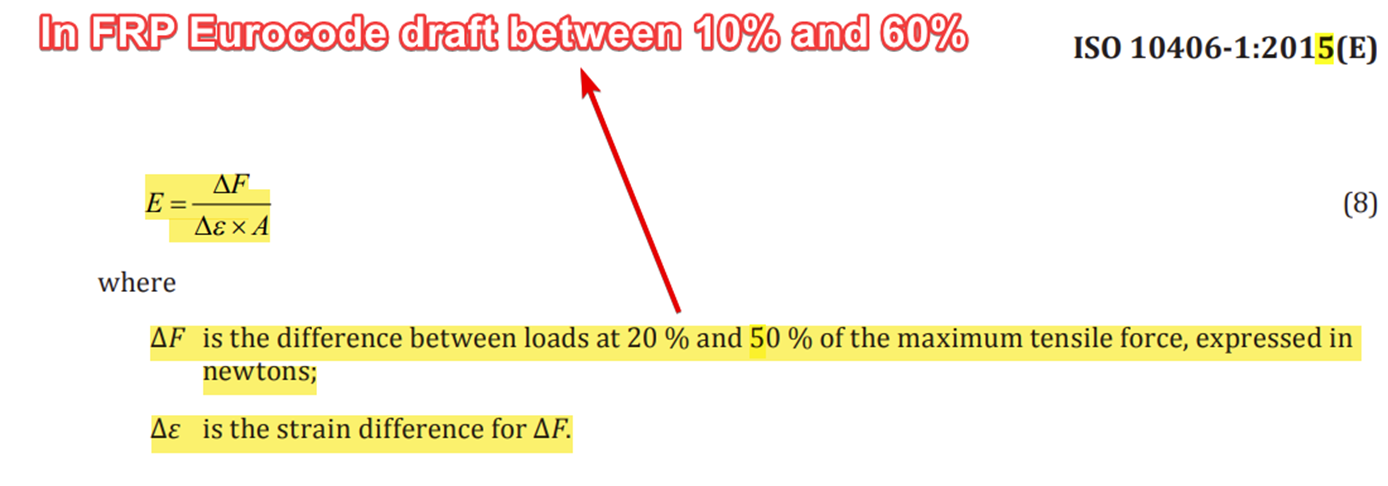

Test F1:
f_10, f_60, eps_10, eps_60 =  1.345 8.069999999999999 0.001387333333333333 0.008993999999999999
E_f = 244224.56 MPa

Test F2:
f_10, f_60, eps_10, eps_60 =  1.5130000000000001 8.3215 0.0018876666666666668 0.009381500000000001
E_f = 250979.84 MPa

Test F3:
f_10, f_60, eps_10, eps_60 =  1.372 8.232 0.0017180000000000001 0.009235799999999999
E_f = 252072.1 MPa

Test F4:
f_10, f_60, eps_10, eps_60 =  1.316 7.896 0.0017273333333333335 0.009303333333333332
E_f = 239926.02 MPa

Test F5:
f_10, f_60, eps_10, eps_60 =  1.292 7.752 0.0013303333333333333 0.008464399999999999
E_f = 250142.1 MPa

E_avg = 247468.92 MPa


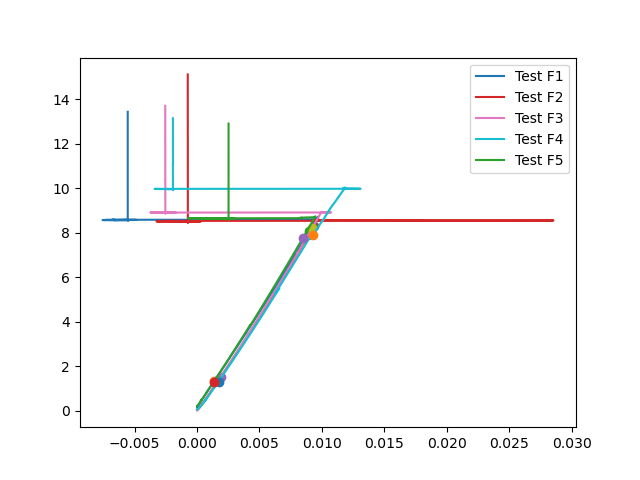

In [4]:
fig, ax = plt.subplots()

according_to_EC = True

E_sum = 0
for i in range(5):
    print('Test F' + str(i + 1) + ':')
    f = - tests_data[i][:, 1]
    f_max_idx = np.argmax(f)
    f_max = np.max(f)
    f = f[:f_max_idx]
    dd1 = - tests_data[i][:, 3][:f_max_idx] / 1000
    f_10 = 0.1 * f_max if according_to_EC else 0.2 * f_max
    f_60 = 0.6 * f_max if according_to_EC else 0.5 * f_max
    eps_10 = np.interp(f_10, f, dd1)
    eps_60 = np.interp(f_60, f, dd1)
    
    # Following condition is to avoid wrong eps_60 when DD1 readings didn't even reach 60% of the force (like test F5)
    if eps_60 < eps_10:
        f_60 = 0.55 * f_max if according_to_EC else 0.45 * f_max
        eps_60 = np.interp(f_60, f, dd1)
        
    print('f_10, f_60, eps_10, eps_60 = ', f_10, f_60, eps_10, eps_60)
    delta_f = f_60 - f_10
    delta_eps = eps_60 - eps_10
    A = 3.62
    E_f = delta_f * 1000/(delta_eps * A)
    E_sum += E_f
    print('E_f = ' + str(np.round(E_f, 2)) + ' MPa')
    print('')
    
    ax.plot(dd1, f, label='Test F' + str(i + 1))
    ax.plot(eps_10, f_10, 'o')
    ax.plot(eps_60, f_60, 'o')

ax.legend()

print('E_avg = ' + str(np.round(E_sum/5, 2)) + ' MPa')